In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x=np.array([1920,1930,1940,1950,1960,1970,1980,1990])
y=np.array([106.46,123.08,132.12,152.27,180.67,205.05,227.23,249.46])

In [4]:
def fx (x1, coef):
    fx = 0
    n = len(coef) - 1
    for p in coef:
        fx = fx + p*x1**n
        n = n - 1
    return fx

In [9]:
import pandas as pd
df_raw = pd.read_csv("MotorJunio2023.csv")

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

motor_data = pd.read_csv("MotorJunio2023.csv")
# Clean temperature data by removing the '°C' and converting to integer
motor_data['Motor'] = motor_data['Motor'].str.replace(' °C', '').astype(int)

# Convert 'Time' column to datetime
motor_data['Time'] = pd.to_datetime(motor_data['Time'])

# Generate a numeric feature for time (e.g., time in seconds from the start of the dataset)
motor_data['Time_Sec'] = (motor_data['Time'] - motor_data['Time'].min()).dt.total_seconds()

# Split data into training and test sets (80% training, 20% testing)
X = motor_data[['Time_Sec']]  # Independent variable (time in seconds)
y = motor_data['Motor']  # Dependent variable (temperature)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions
y_pred_train = reg_model.predict(X_train)
y_pred_test = reg_model.predict(X_test)

# Calculate Mean Squared Error for train and test sets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

mse_train, mse_test


(57.493381458797984, 57.095945080163034)

In [65]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft

# Suponiendo que los datos de temperatura están en motor_data['Motor'] y ya han sido limpiados
temperatures = motor_data['Motor'].values

# Aplicar la Transformada Rápida de Fourier (FFT)
fft_coefficients = fft(temperatures)

# Filtrar frecuencias más altas (ruido), manteniendo solo las frecuencias más significativas
# Retenemos un 5% de las frecuencias (ajusta según el nivel de compresión que necesites)
keep_fraction = 0.05
n = len(fft_coefficients)
fft_filtered = np.copy(fft_coefficients)
fft_filtered[int(n * keep_fraction):int(n * (1 - keep_fraction))] = 0

# Aplicar la transformada inversa de Fourier para obtener los datos filtrados
compressed_temperatures = ifft(fft_filtered).real

# Crear un nuevo DataFrame con los datos reducidos
compressed_data = pd.DataFrame({
    'Time': motor_data['Time'],  # Mantiene las marcas de tiempo originales
    'Compressed_Temperature': compressed_temperatures
})

# Ver los datos reducidos
compressed_data
# Guarda 'compressed_data' en la base de datos


,Time,Compressed_Temperature
0,2023-01-31 20:02:57,70.529504
1,2023-01-31 20:02:58,70.091999
2,2023-01-31 20:03:13,69.675537
3,2023-01-31 20:03:14,69.293052
4,2023-01-31 20:03:31,68.955548
...,...,...
180885,2023-02-28 19:41:15,72.543798
180886,2023-02-28 19:41:17,72.207419
180887,2023-02-28 19:41:18,71.826214
180888,2023-02-28 19:41:19,71.410831


<Axes: xlabel='Time', ylabel='Compressed_Temperature'>

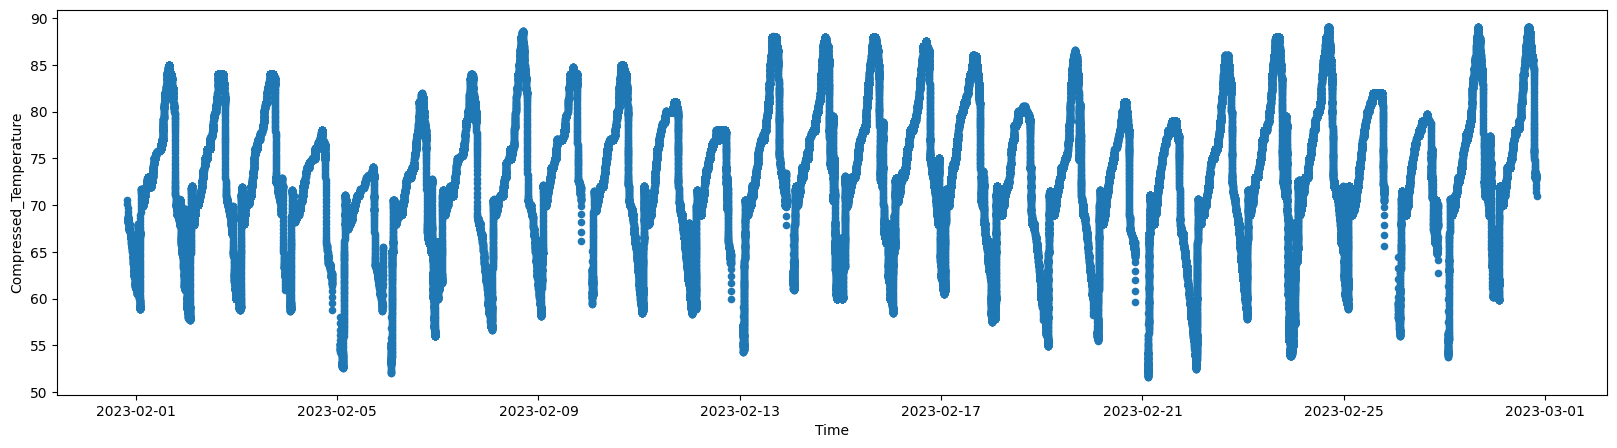

In [67]:
compressed_data.plot(kind="scatter",x='Time',y='Compressed_Temperature',figsize=(20,5))

In [55]:

df = df_raw.copy(deep=True)

In [56]:
df['Motor'] = df['Motor'].str.replace("°C","")

df['Time'] = pd.to_datetime(df['Time'])
df['Motor']= pd.to_numeric( df['Motor'])

In [57]:
df.index = pd.DatetimeIndex(df['Time'])

In [62]:
df.last("1ME")

C:\Users\ramamani\AppData\Local\Temp\ipykernel_9032\1142088757.py:1: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead



,Time,Motor
Time,,
2023-01-31 20:02:57,2023-01-31 20:02:57,68
2023-01-31 20:02:58,2023-01-31 20:02:58,69
2023-01-31 20:03:13,2023-01-31 20:03:13,68
2023-01-31 20:03:14,2023-01-31 20:03:14,69
2023-01-31 20:03:31,2023-01-31 20:03:31,68
...,...,...
2023-02-28 19:41:15,2023-02-28 19:41:15,73
2023-02-28 19:41:17,2023-02-28 19:41:17,73
2023-02-28 19:41:18,2023-02-28 19:41:18,73


<Axes: ylabel='Frequency'>

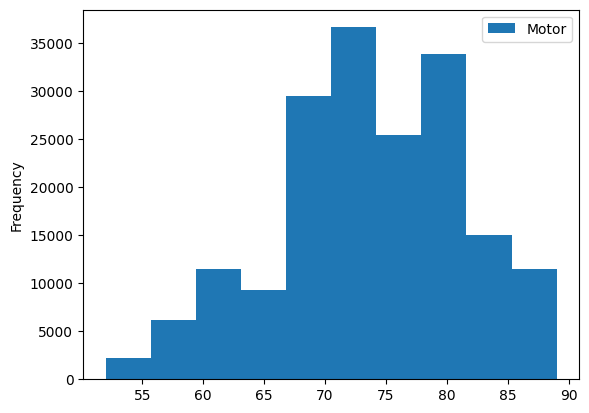

In [40]:
df.plot(kind='hist')

<Axes: xlabel='Time', ylabel='Motor'>

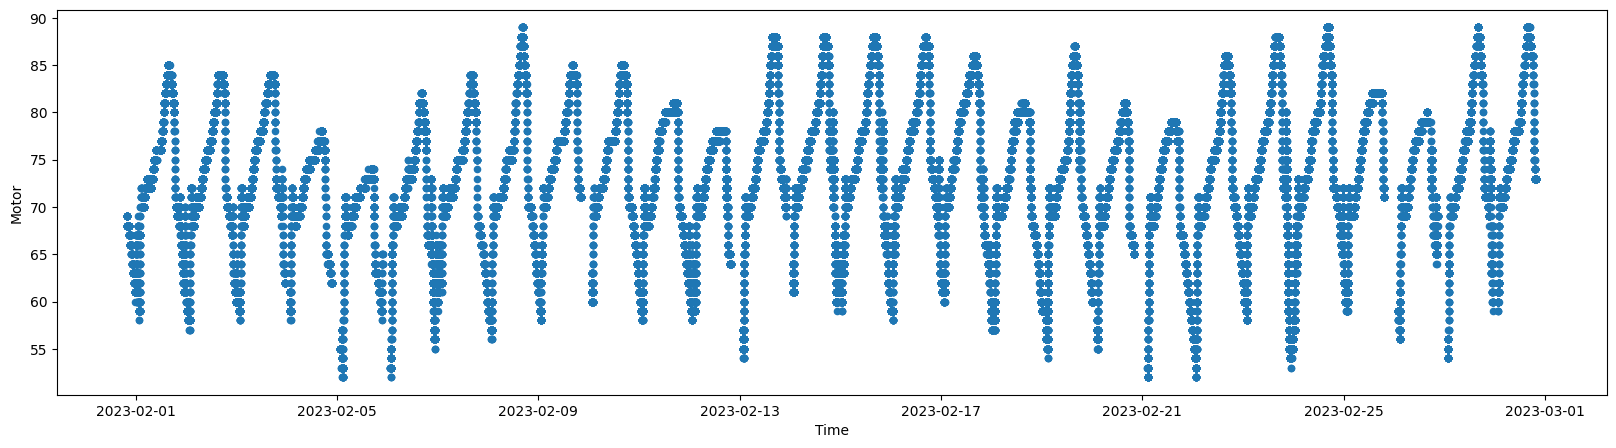

In [38]:
df.plot(kind='scatter',x='Time',y='Motor',figsize=(20,5))

In [53]:
df.describe()

,Time,Motor
count,180890,180890.000000
mean,2023-02-16 04:09:28.710178048,73.720731
min,2023-01-31 20:02:57,52.000000
25%,2023-02-11 10:36:16.249999872,69.000000
50%,2023-02-16 18:08:13,74.000000
75%,2023-02-22 07:03:51.500000,79.000000
max,2023-02-28 19:55:13,89.000000
std,NaN,7.585576


In [74]:
df

DatetimeIndex(['2023-01-31 20:02:57', '2023-01-31 20:02:58',
               '2023-01-31 20:03:13', '2023-01-31 20:03:14',
               '2023-01-31 20:03:31', '2023-01-31 20:03:32',
               '2023-01-31 20:03:33', '2023-01-31 20:03:36',
               '2023-01-31 20:03:40', '2023-01-31 20:03:46',
               ...
               '2023-02-28 19:40:57', '2023-02-28 19:41:08',
               '2023-02-28 19:41:09', '2023-02-28 19:41:13',
               '2023-02-28 19:41:14', '2023-02-28 19:41:15',
               '2023-02-28 19:41:17', '2023-02-28 19:41:18',
               '2023-02-28 19:41:19', '2023-02-28 19:55:13'],
              dtype='datetime64[ns]', name='Time', length=180890, freq=None)

In [69]:
df_raw.head()

,Time,Motor
0,2023-01-31 20:02:57,68 °C
1,2023-01-31 20:02:58,69 °C
2,2023-01-31 20:03:13,68 °C
3,2023-01-31 20:03:14,69 °C
4,2023-01-31 20:03:31,68 °C


para grado 0 la predicción es 172.04249999999996


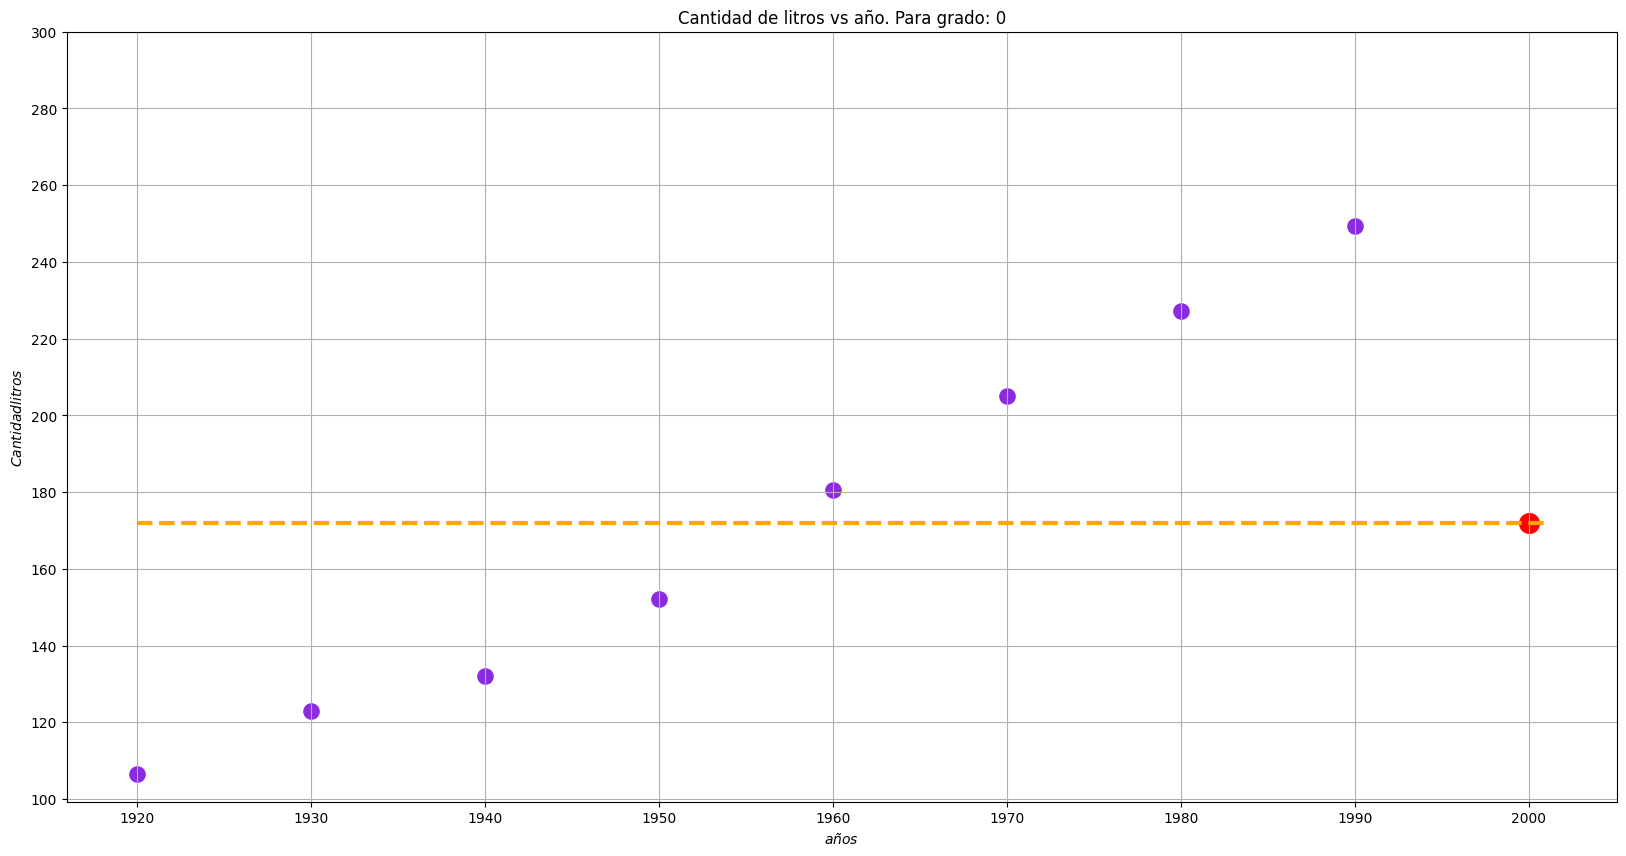

para grado 1 la predicción es 266.80714285714294


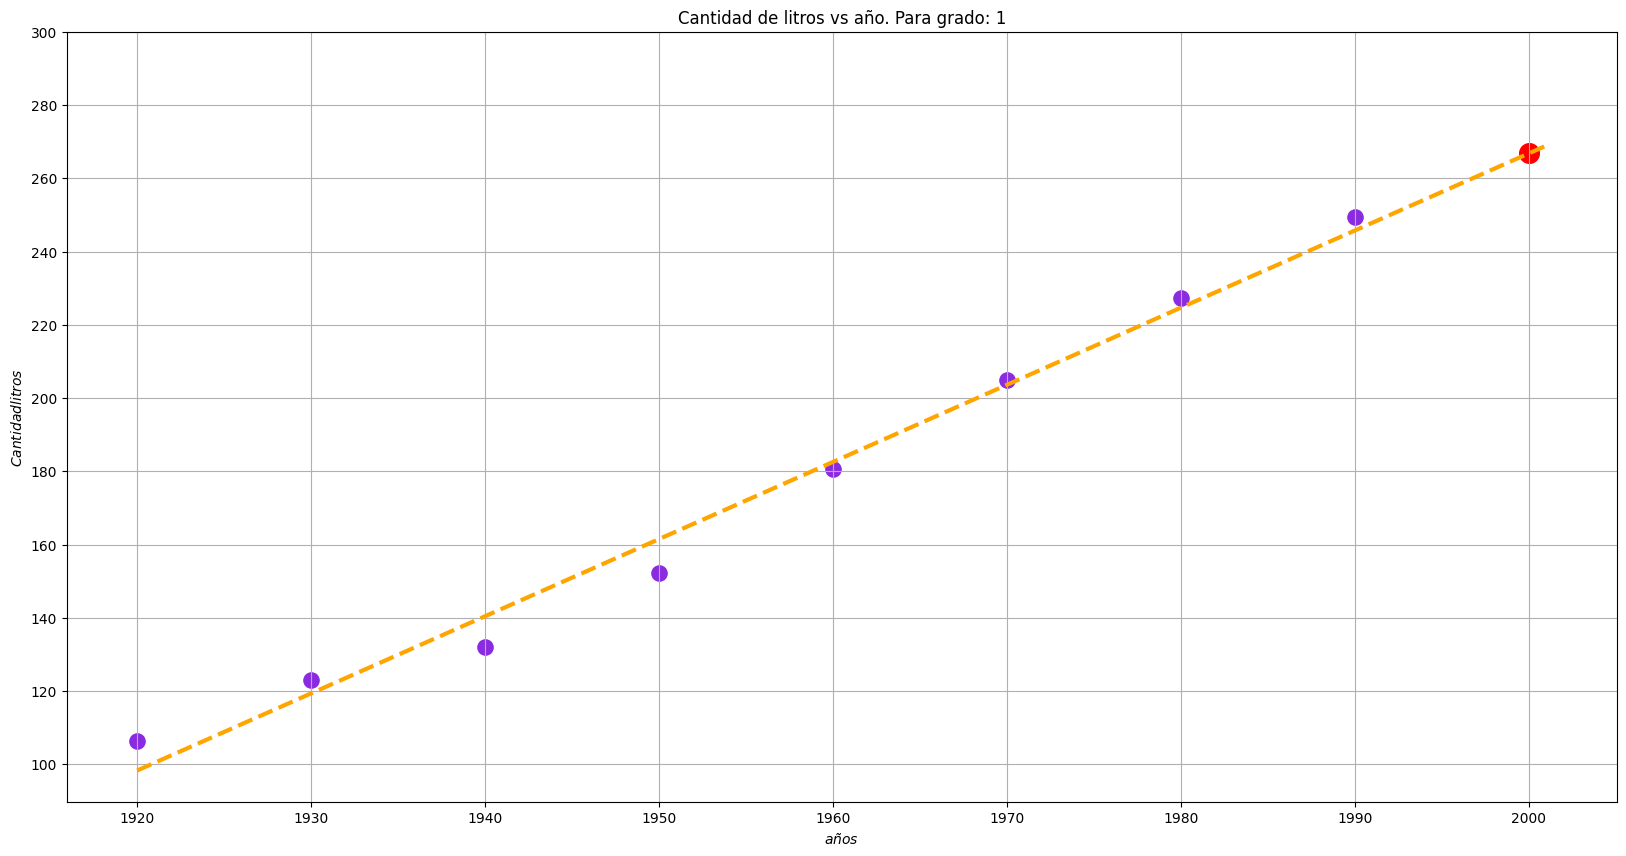

para grado 2 la predicción es 281.5874999999287


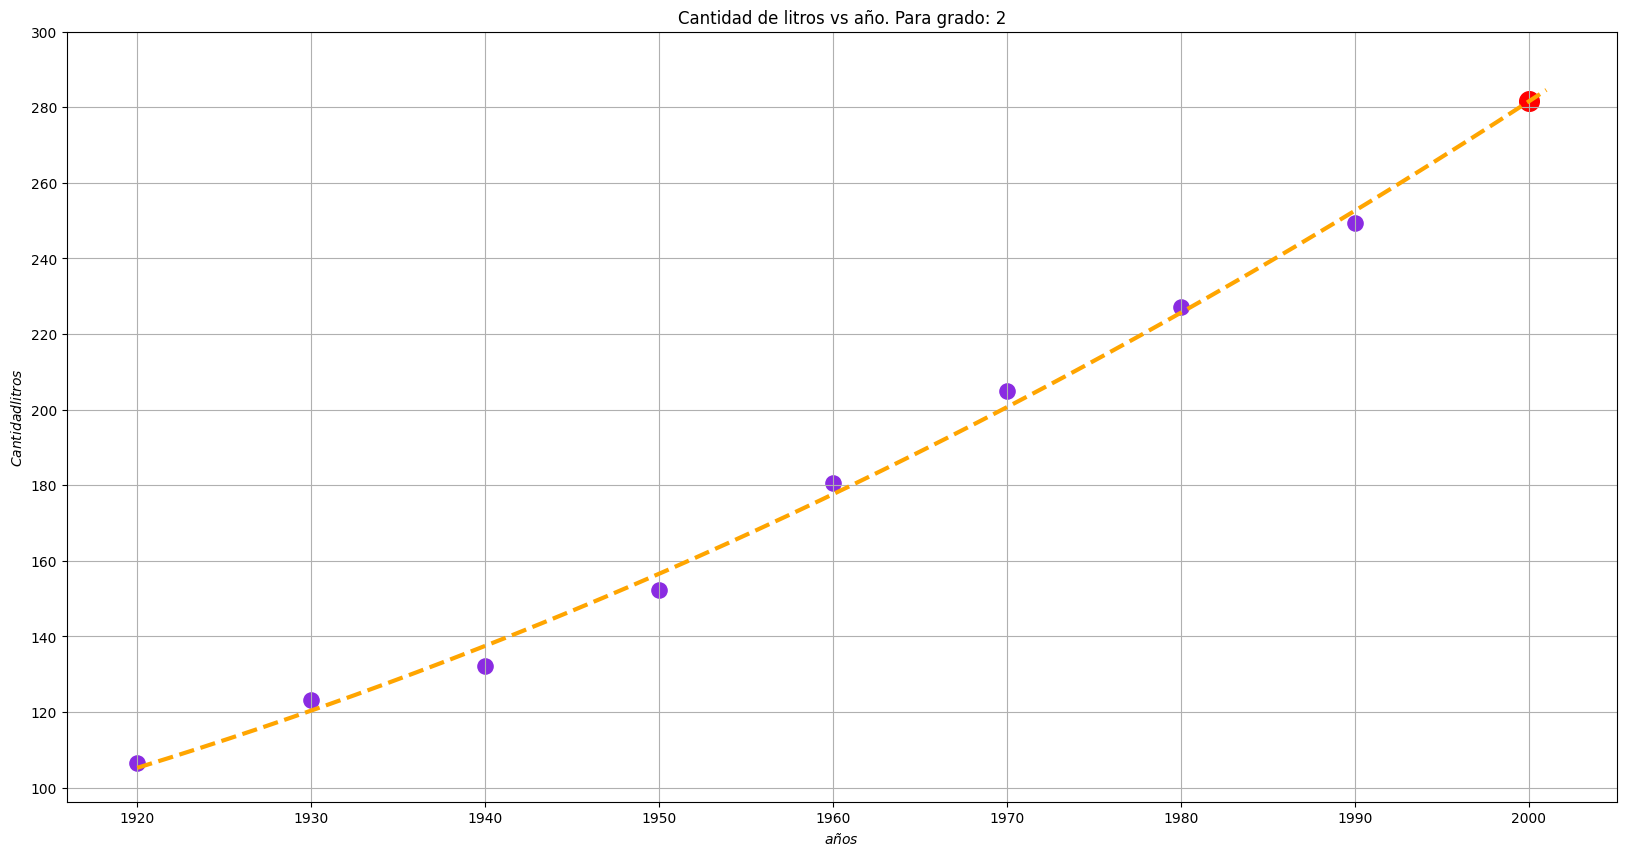

para grado 3 la predicción es 267.1550000049174


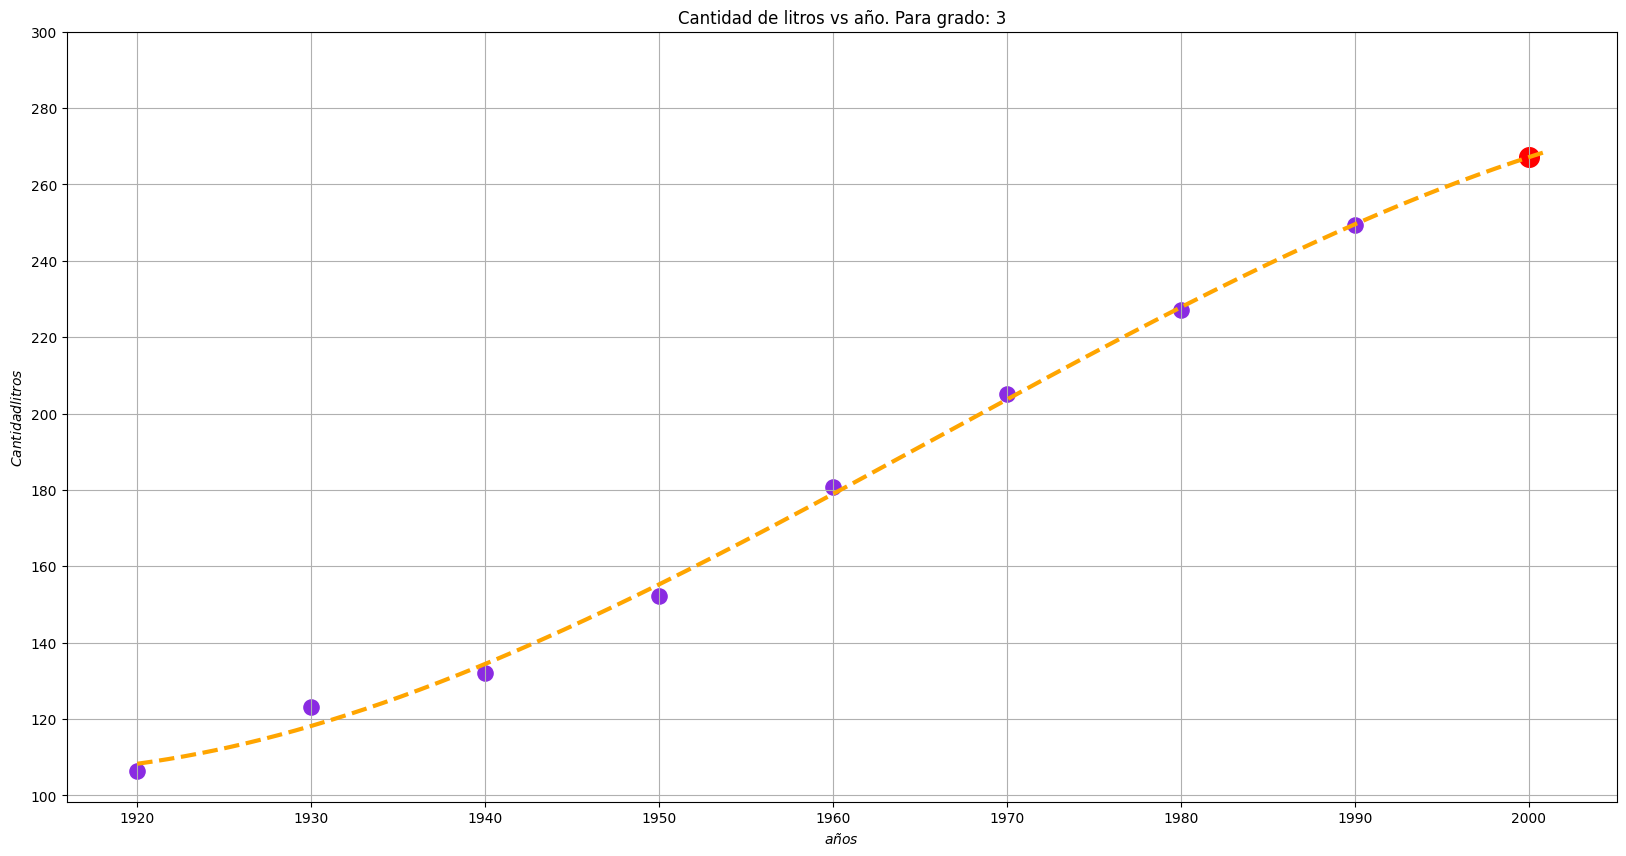

para grado 4 la predicción es 254.67714281380177


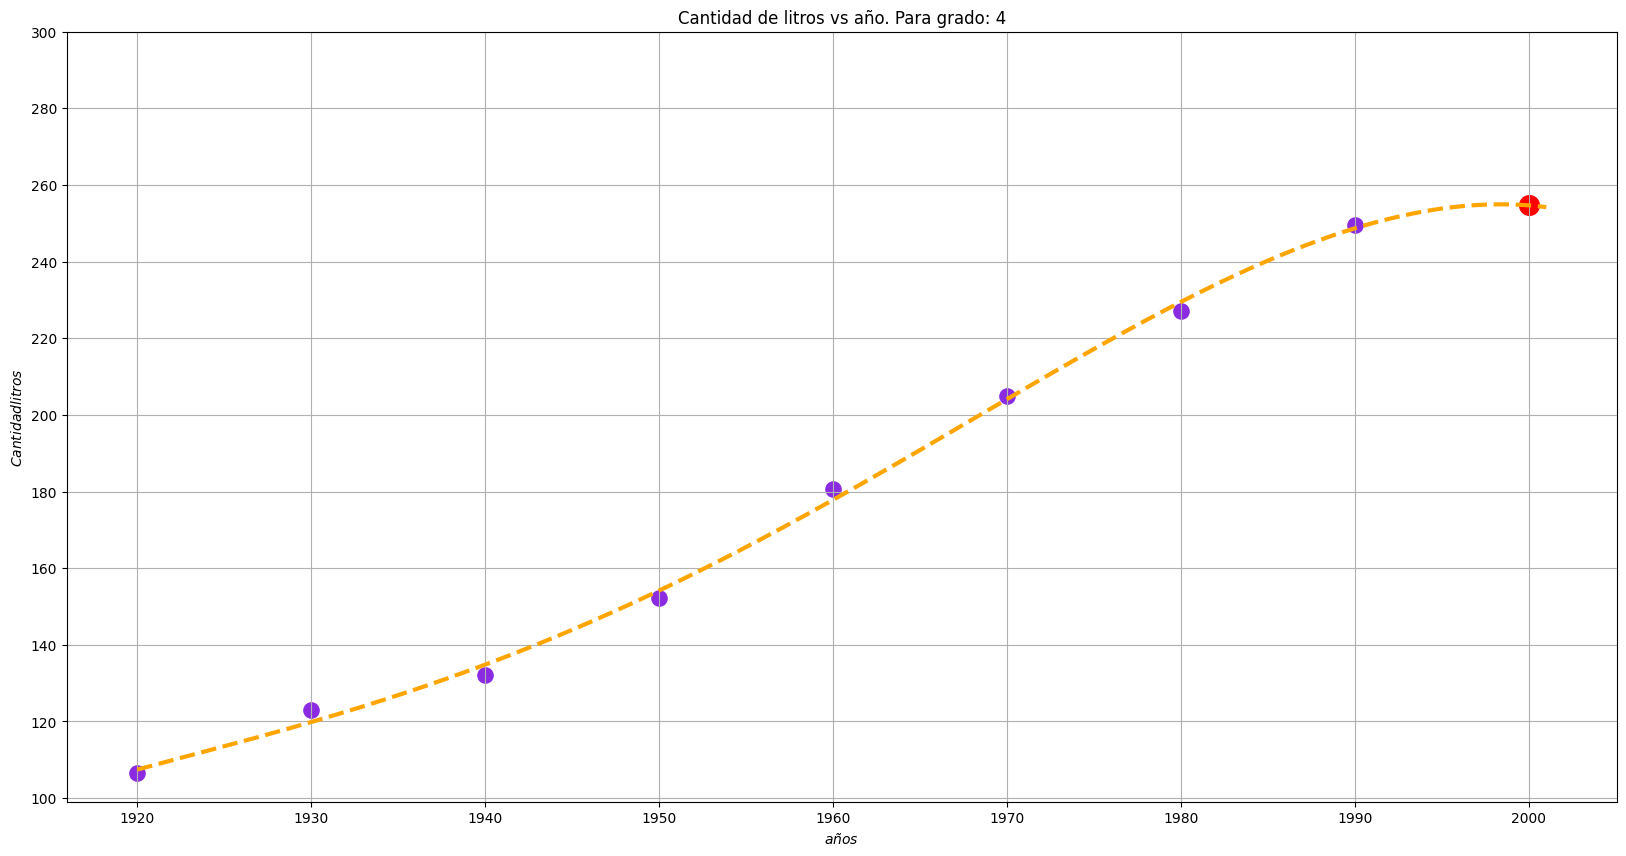

para grado 5 la predicción es 307.9802436828613


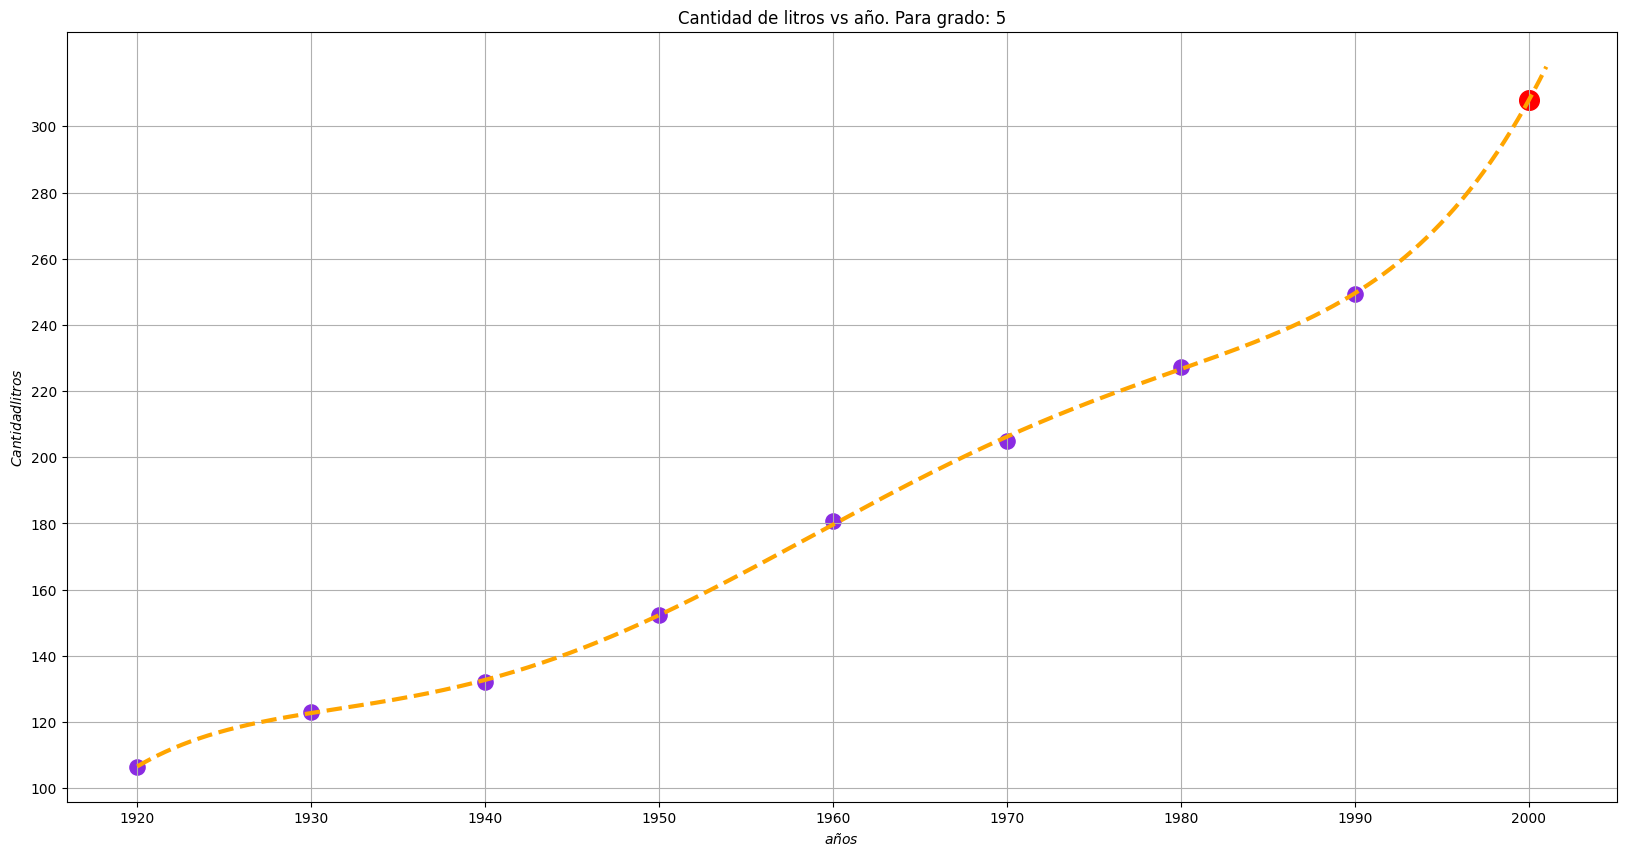

para grado 6 la predicción es 266.0390625


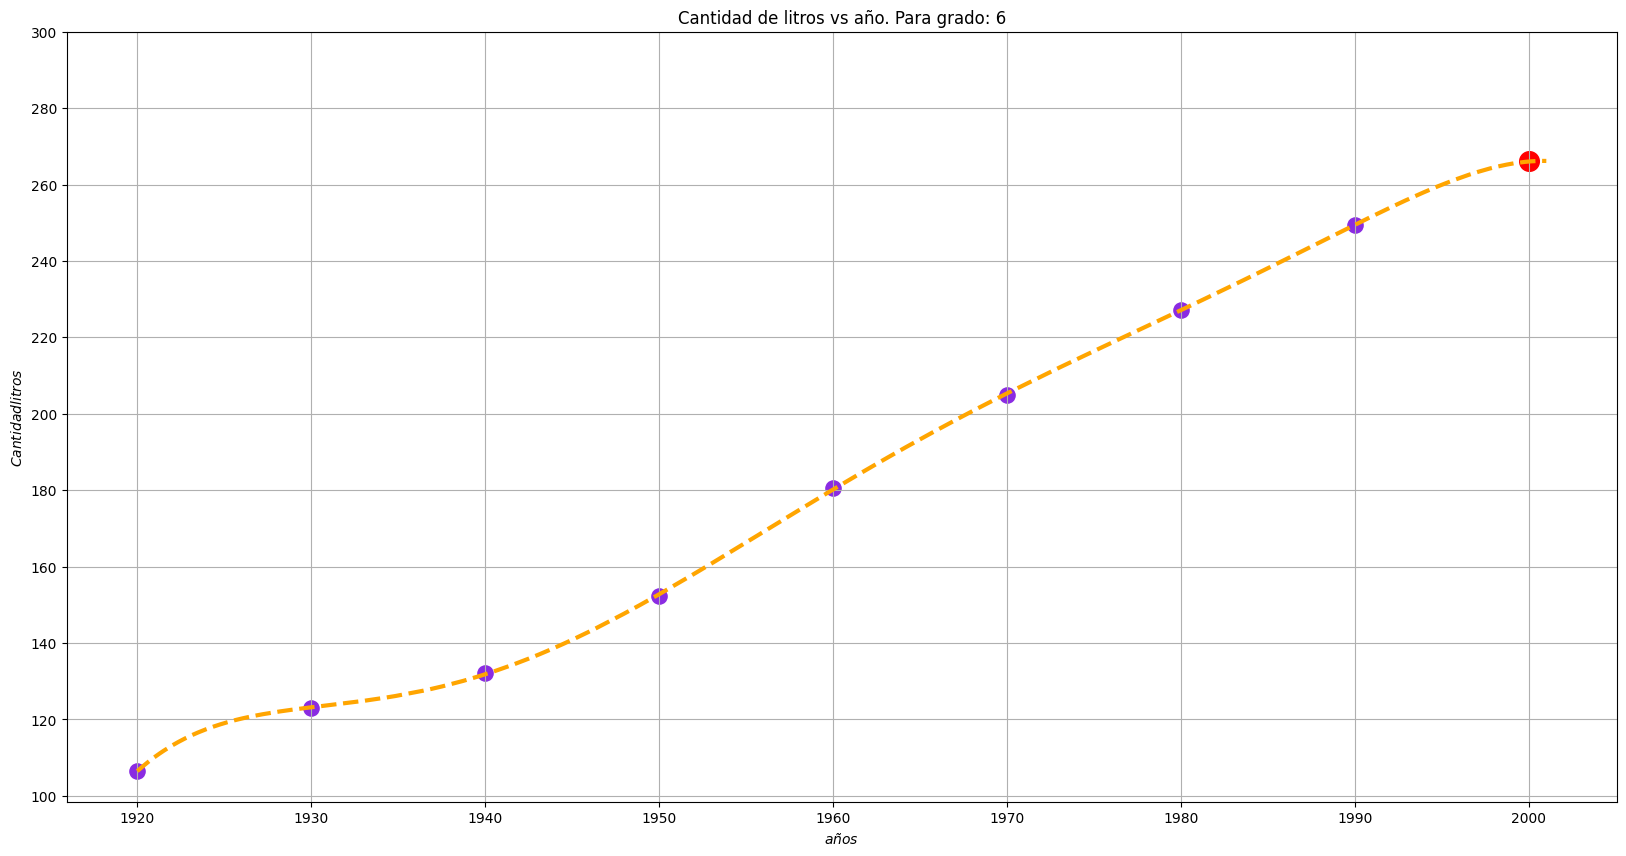

C:\Users\ramamani\AppData\Local\Temp\ipykernel_9032\2511666960.py:3: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)


para grado 7 la predicción es 265.5450439453125


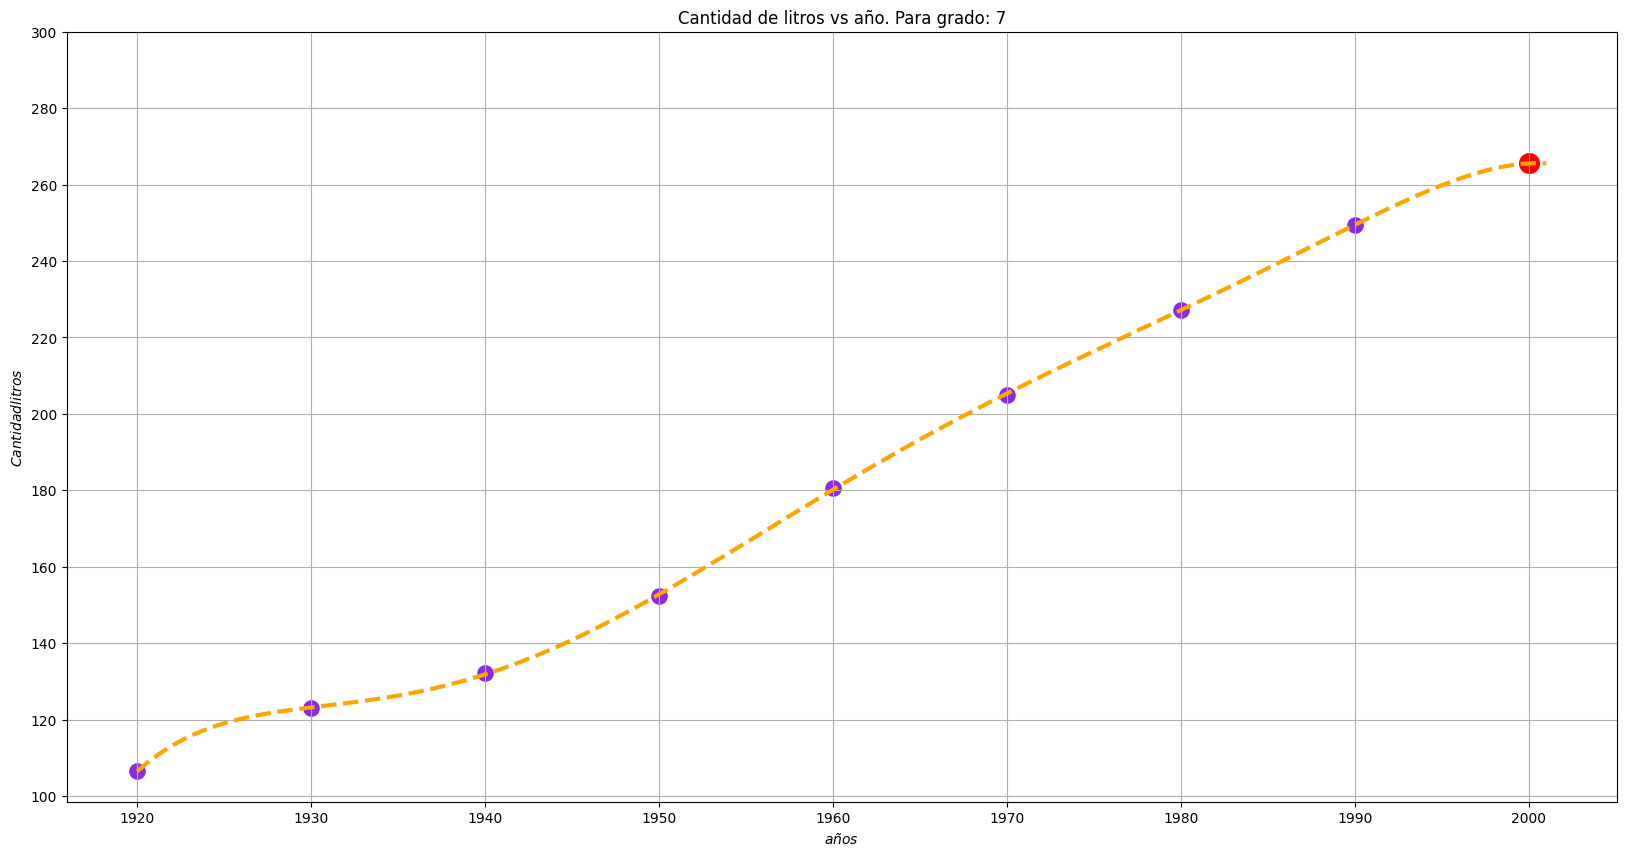

C:\Users\ramamani\AppData\Local\Temp\ipykernel_9032\2511666960.py:3: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)


para grado 8 la predicción es 265.0543212890625


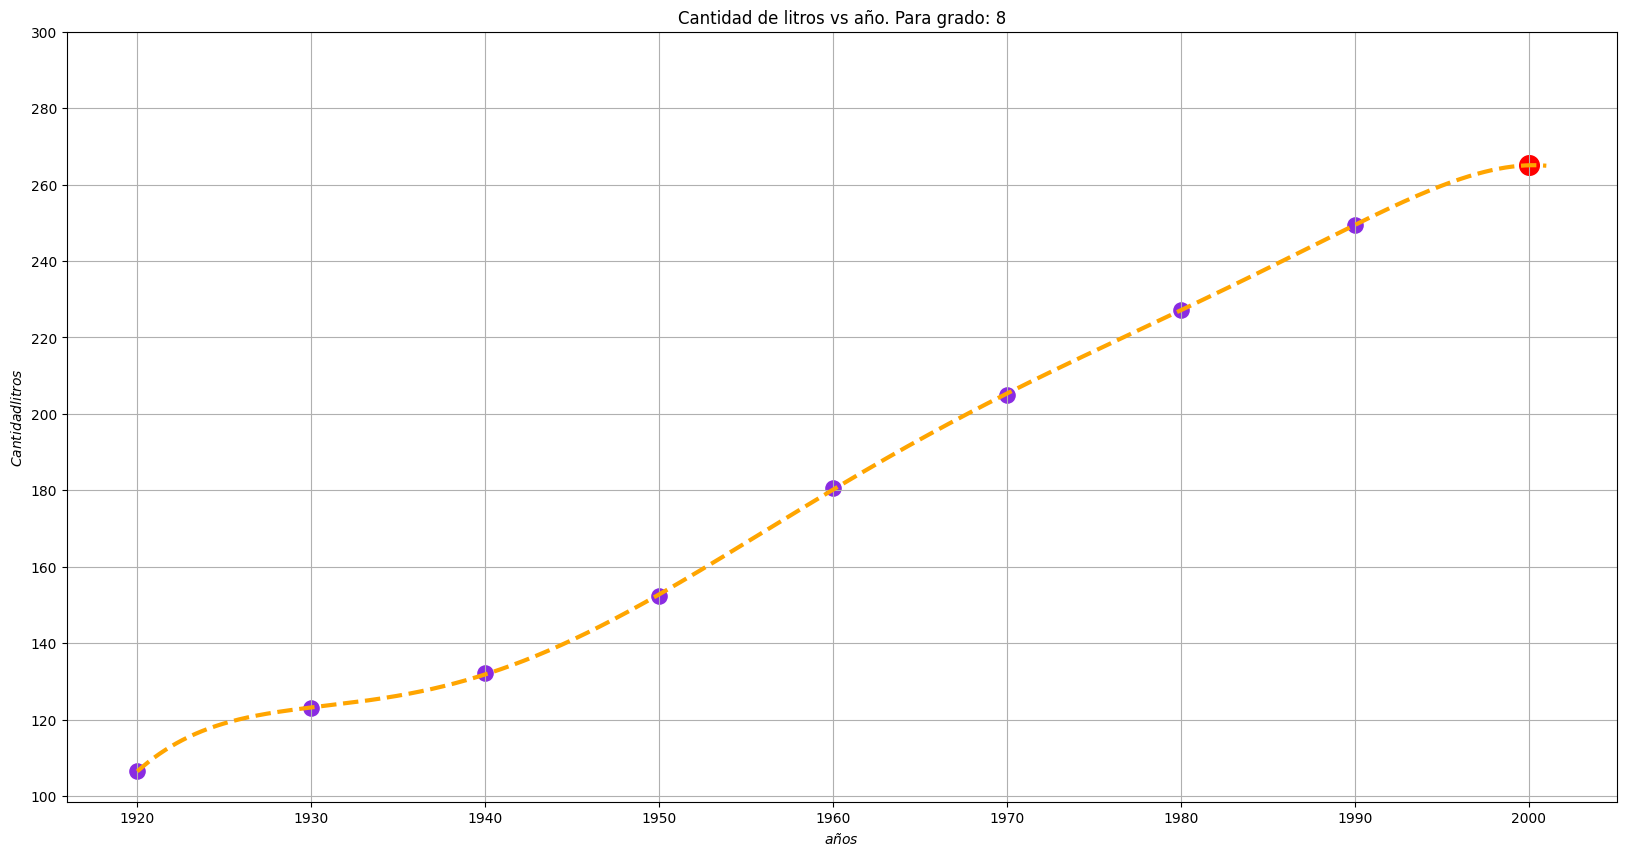

C:\Users\ramamani\AppData\Local\Temp\ipykernel_9032\2511666960.py:3: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)


para grado 9 la predicción es 264.5437927246094


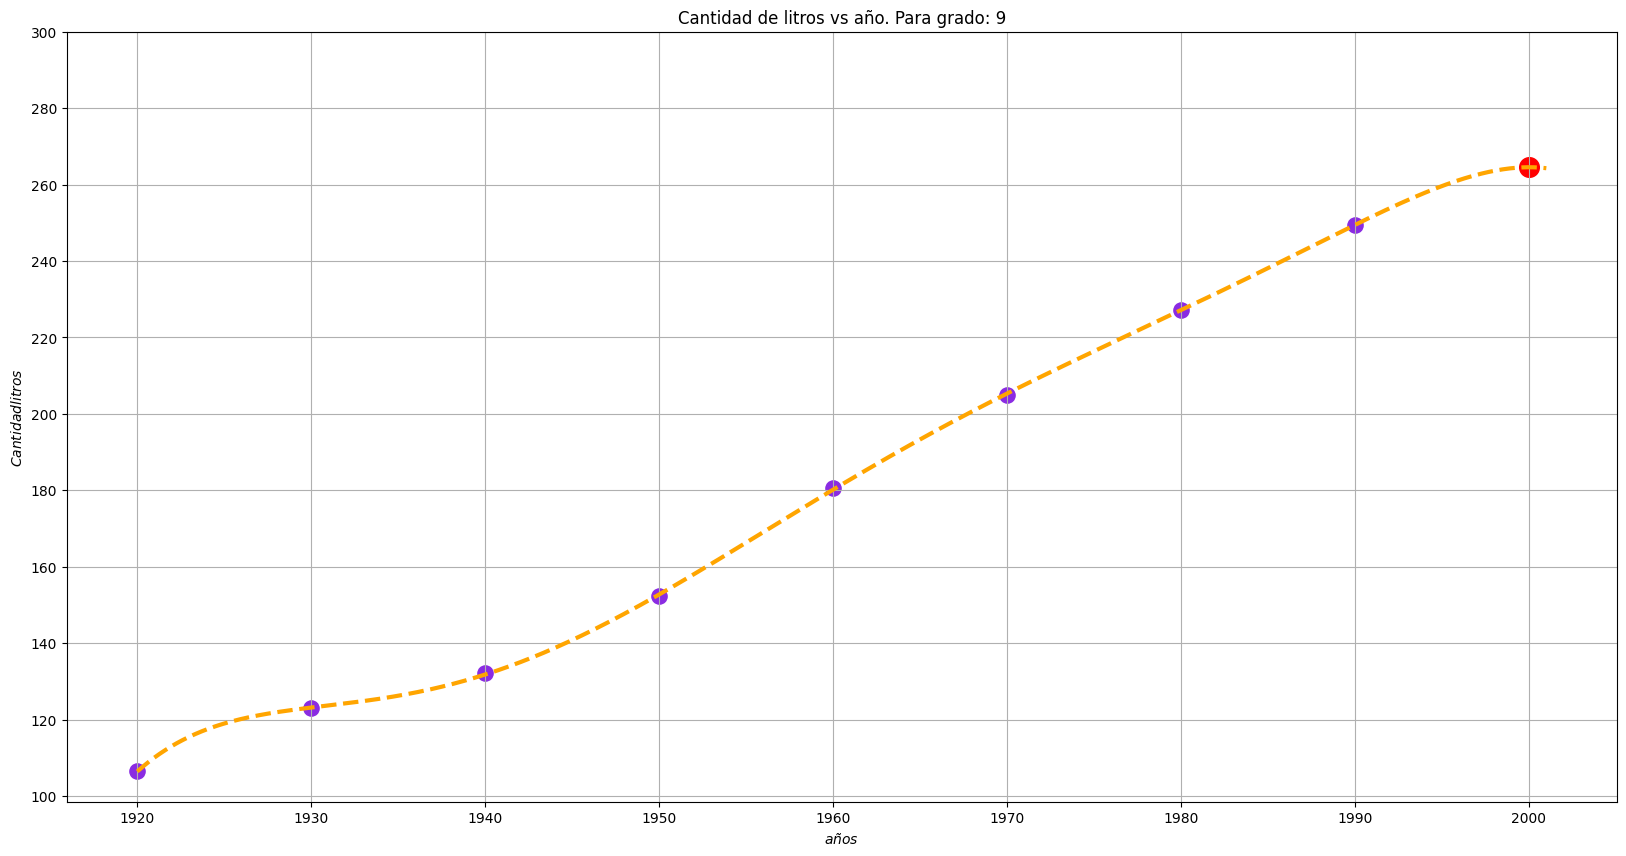

In [5]:
anno = 2000
for i in range(0,10):
    coef = np.polyfit(x,y,i)
    p = np.polyval(coef, anno)
    
    print(f"para grado {i} la predicción es {p}")
    x1 = np.linspace(1920, anno + 1, 1000)
    y1 = fx(x1, coef) # funcion
    plt.figure(figsize=[20,10])
    plt.title("Cantidad de litros vs año. Para grado: " + str(i))
    
    plt.scatter(x,y,s=120,c='blueviolet')
    plt.plot(x1,y1,"--",linewidth=3,color='orange')
    plt.scatter(anno,p,s=200,c='red')
    plt.yticks(range(100,320,20))
    plt.grid("on")
    ax=plt.gca()
    ax.set_xlabel("$años$")
    ax.set_ylabel("$Cantidad litros$")
    #plt.savefig("img" + str(i)+".jpg", dpi=600)
    plt.show()

Para grado 0 El MES es: 2360.77584375
Para grado 1 El MES es: 32.54018630952462
Para grado 2 El MES es: 12.150683630957953
Para grado 3 El MES es: 5.8386516230072205
Para grado 4 El MES es: 4.615443519464932
Para grado 5 El MES es: 0.4009156993676121
Para grado 6 El MES es: 0.08570160641669872
Para grado 7 El MES es: 0.084890231931206
Para grado 8 El MES es: 0.08410037442445402
Para grado 9 El MES es: 0.08324448305051423
Para grado 10 El MES es: 0.08241519680348809
Para grado 11 El MES es: 0.08155788291085864
Para grado 12 El MES es: 0.08071412202363956
Para grado 13 El MES es: 2.282395362851928e-05
Para grado 14 El MES es: 8.564436435692548e-06
Para grado 15 El MES es: 9.085178375205518e-07
Para grado 16 El MES es: 7.434129715041864e-07
Para grado 17 El MES es: 1.7329454422526786e-07
Para grado 18 El MES es: 8.073970675379732e-08
Para grado 19 El MES es: 2.4567693471980315e-07
Para grado 20 El MES es: 9.099822491623559e-08
Para grado 21 El MES es: 1.7288699745348842e-08
Para grado 22 

C:\Users\ramamani\AppData\Local\Temp\ipykernel_9032\810551574.py:6: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
C:\Users\ramamani\AppData\Local\Temp\ipykernel_9032\810551574.py:6: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
C:\Users\ramamani\AppData\Local\Temp\ipykernel_9032\810551574.py:6: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
C:\Users\ramamani\AppData\Local\Temp\ipykernel_9032\810551574.py:6: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
C:\Users\ramamani\AppData\Local\Temp\ipykernel_9032\810551574.py:6: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
C:\Users\ramamani\AppData\Local\Temp\ipykernel_9032\810551574.py:6: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
C:\Users\ramamani\AppData\Local\Temp\ipykernel_9032\810551574.py:6: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
C:\Use

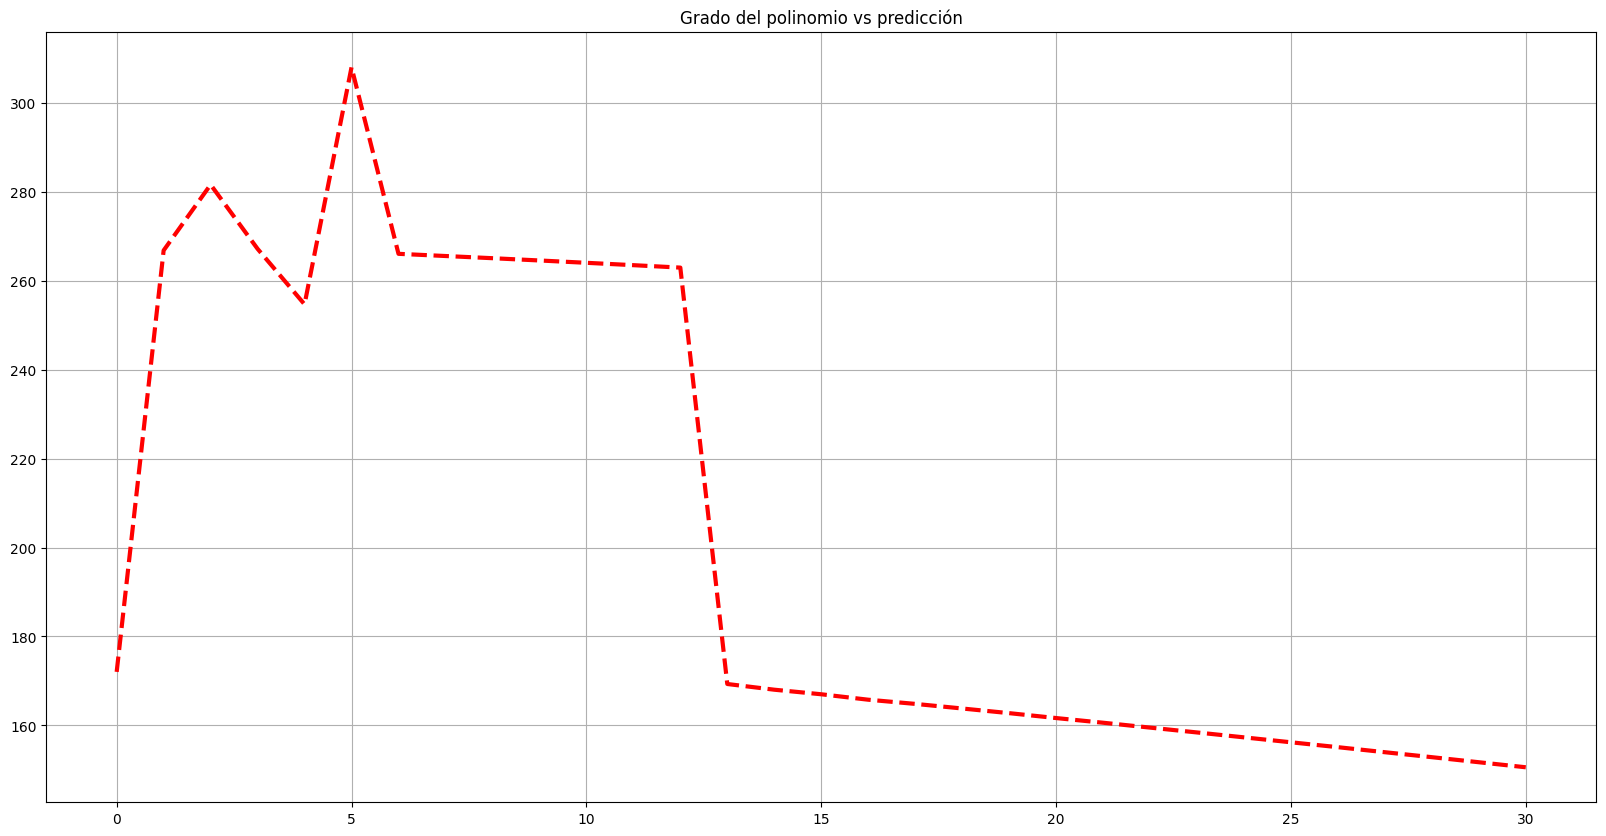

In [6]:
anno = 2000
grado = np.arange(0, 30 + 1, 1) #de 0 a 100 de 1 en 1
aproxi = np.array([])
y_pred_vec = np.array([])
for i in grado:
    coef = np.polyfit(x,y,i)
    p = np.polyval(coef, anno)
    aproxi = np.append(aproxi, p)
    
    # para la MSE
    y_pred_vec = np.array([])
    for j in x: # para la MSE
        y_pred = np.polyval(coef, j)
        y_pred_vec = np.append(y_pred_vec,y_pred)
    #print(f"los y: {y}")
    #print(f"los y_aprox: {y_pred_vec}")
    MSE = (sum( (y - y_pred_vec)**2 ))/len(y)
    print(f"Para grado {i} El MES es: {MSE}")
plt.figure(figsize=[20,10])
plt.title("Grado del polinomio vs predicción")
plt.plot(grado,aproxi,"--",linewidth=3,color='red')
plt.grid("on")
plt.show()